<a href="https://colab.research.google.com/github/Manhatai/Data_Science_Bootcamp/blob/main/Dane_gie%C5%82dowe_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Załadowanie danych i bibliotek

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2024-02-02 to 2019-02-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-02-02,169.1900,172.5000,167.3300,171.8100,117218313
2024-02-01,155.8700,159.7600,155.6200,159.2800,76542419
2024-01-31,157.0000,159.0100,154.8100,155.2000,50284371
2024-01-30,160.7000,161.7300,158.4900,159.0000,45207430
2024-01-29,159.3400,161.2900,158.9000,161.2600,45270385
...,...,...,...,...,...
2019-02-12,80.2000,81.9700,79.9440,81.9005,97172080
2019-02-11,80.0490,80.4645,79.3000,79.5500,66346560
2019-02-08,79.3000,79.4295,78.3380,79.4110,113149140


In [ ]:
df.head() # Zwraca domyślnie 5 pierwszych wierszy

,Open,High,Low,Close,Volume
Date,,,,,
2024-02-02,169.19,172.50,167.33,171.81,117218313
2024-02-01,155.87,159.76,155.62,159.28,76542419
2024-01-31,157.00,159.01,154.81,155.20,50284371
2024-01-30,160.70,161.73,158.49,159.00,45207430
2024-01-29,159.34,161.29,158.90,161.26,45270385


In [ ]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2024-02-02,169.19,172.500,167.3300,171.81,117218313
2024-02-01,155.87,159.760,155.6200,159.28,76542419
2024-01-31,157.00,159.010,154.8100,155.20,50284371
2024-01-30,160.70,161.730,158.4900,159.00,45207430
2024-01-29,159.34,161.290,158.9000,161.26,45270385
2024-01-26,158.42,160.720,157.9100,159.12,51047353
2024-01-25,156.95,158.505,154.5501,157.75,43638592
2024-01-24,157.80,158.510,156.4800,156.87,48547315
2024-01-23,154.85,156.210,153.9300,156.02,37986039


In [ ]:
df.tail() # Zwraca domyślnie 5 ostatnich wierszy

,Open,High,Low,Close,Volume
Date,,,,,
2019-02-12,80.2000,81.9700,79.9440,81.9005,97172080
2019-02-11,80.0490,80.4645,79.3000,79.5500,66346560
2019-02-08,79.3000,79.4295,78.3380,79.4110,113149140
2019-02-07,81.2500,81.2770,79.6455,80.7185,92531780
2019-02-06,83.5375,83.6130,81.6670,82.0130,78797660


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2024-02-02,169.19,172.50,167.33,171.81,117218313
2024-02-01,155.87,159.76,155.62,159.28,76542419
2024-01-31,157.00,159.01,154.81,155.20,50284371
2024-01-30,160.70,161.73,158.49,159.00,45207430
2024-01-29,159.34,161.29,158.90,161.26,45270385


In [ ]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,129.040648,130.612470,127.374675,129.015459,7.435142e+07
std,30.846450,31.133445,30.486203,30.772240,3.247990e+07
min,79.300000,79.429500,78.338000,79.411000,1.762674e+07
25%,96.666500,97.780000,95.380000,96.790000,5.270428e+07
50%,129.500000,131.000000,127.370000,129.040000,6.531114e+07
75%,158.400000,160.100000,156.365000,158.139000,8.677418e+07
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.290406e+02,3.084645e+01,7.930000e+01,9.666650e+01,129.50,1.584000e+02,1.872000e+02
high,1257.0,1.306125e+02,3.113345e+01,7.942950e+01,9.778000e+01,131.00,1.601000e+02,1.886540e+02
low,1257.0,1.273747e+02,3.048620e+01,7.833800e+01,9.538000e+01,127.37,1.563650e+02,1.848400e+02
close,1257.0,1.290155e+02,3.077224e+01,7.941100e+01,9.679000e+01,129.04,1.581390e+02,1.865700e+02
volume,1257.0,7.435142e+07,3.247990e+07,1.762674e+07,5.270428e+07,65311140.00,8.677418e+07,3.113457e+08


### Eksploracja danych

In [ ]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2024-02-02,169.19,172.500,167.3300,171.81,117218313
2024-02-01,155.87,159.760,155.6200,159.28,76542419
2024-01-31,157.00,159.010,154.8100,155.20,50284371
2024-01-30,160.70,161.730,158.4900,159.00,45207430
2024-01-29,159.34,161.290,158.9000,161.26,45270385
2024-01-26,158.42,160.720,157.9100,159.12,51047353
2024-01-25,156.95,158.505,154.5501,157.75,43638592
2024-01-24,157.80,158.510,156.4800,156.87,48547315
2024-01-23,154.85,156.210,153.9300,156.02,37986039


In [ ]:
df['open']

Date
2024-02-02    169.19
2024-02-01    155.87
2024-01-31    157.00
2024-01-30    160.70
2024-01-29    159.34
2024-01-26    158.42
2024-01-25    156.95
2024-01-24    157.80
2024-01-23    154.85
2024-01-22    156.89
Name: open, dtype: float64

In [ ]:
df.open

Date
2024-02-02    169.19
2024-02-01    155.87
2024-01-31    157.00
2024-01-30    160.70
2024-01-29    159.34
2024-01-26    158.42
2024-01-25    156.95
2024-01-24    157.80
2024-01-23    154.85
2024-01-22    156.89
Name: open, dtype: float64

In [ ]:
df[['open']]

,open
Date,
2024-02-02,169.19
2024-02-01,155.87
2024-01-31,157.00
2024-01-30,160.70
2024-01-29,159.34
2024-01-26,158.42
2024-01-25,156.95
2024-01-24,157.80
2024-01-23,154.85


In [ ]:
df[['open', 'close']]

,open,close
Date,,
2024-02-02,169.19,171.81
2024-02-01,155.87,159.28
2024-01-31,157.00,155.20
2024-01-30,160.70,159.00
2024-01-29,159.34,161.26
2024-01-26,158.42,159.12
2024-01-25,156.95,157.75
2024-01-24,157.80,156.87
2024-01-23,154.85,156.02


In [128]:
df.iloc[:, 0]

Date
2019-05-10    42.00
2019-05-13    38.79
2019-05-14    38.31
2019-05-15    39.37
2019-05-16    41.48
              ...  
2024-01-29    65.60
2024-01-30    66.90
2024-01-31    65.70
2024-02-01    66.12
2024-02-02    66.98
Name: Open, Length: 1192, dtype: float64

In [ ]:
df.iloc[:, [0,3]]

,open,close
Date,,
2024-02-02,169.19,171.81
2024-02-01,155.87,159.28
2024-01-31,157.00,155.20
2024-01-30,160.70,159.00
2024-01-29,159.34,161.26
2024-01-26,158.42,159.12
2024-01-25,156.95,157.75
2024-01-24,157.80,156.87
2024-01-23,154.85,156.02


In [ ]:
df.iloc[:, [3,4]]

,close,volume
Date,,
2024-02-02,171.81,117218313
2024-02-01,159.28,76542419
2024-01-31,155.20,50284371
2024-01-30,159.00,45207430
2024-01-29,161.26,45270385
2024-01-26,159.12,51047353
2024-01-25,157.75,43638592
2024-01-24,156.87,48547315
2024-01-23,156.02,37986039


In [135]:
df.iloc[:, -1]

Date
2019-05-10         NaN
2019-05-13   -0.107529
2019-05-14    0.077089
2019-05-15    0.033283
2019-05-16    0.041414
                ...   
2024-01-29    0.022283
2024-01-30   -0.002090
2024-01-31   -0.023489
2024-02-01    0.022369
2024-02-02    0.020081
Name: Daily_change, Length: 1192, dtype: float64

In [ ]:
df.iloc[:, [-1]]

,volume
Date,
2024-02-02,117218313
2024-02-01,76542419
2024-01-31,50284371
2024-01-30,45207430
2024-01-29,45270385
2024-01-26,51047353
2024-01-25,43638592
2024-01-24,48547315
2024-01-23,37986039


In [ ]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2024-02-02,167.3300,171.81,117218313
2024-02-01,155.6200,159.28,76542419
2024-01-31,154.8100,155.20,50284371
2024-01-30,158.4900,159.00,45207430
2024-01-29,158.9000,161.26,45270385
2024-01-26,157.9100,159.12,51047353
2024-01-25,154.5501,157.75,43638592
2024-01-24,156.4800,156.87,48547315
2024-01-23,153.9300,156.02,37986039


### Selekcja wierszy

In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2024-02-02,169.19,172.500,167.3300,171.81,117218313
2024-02-01,155.87,159.760,155.6200,159.28,76542419
2024-01-31,157.00,159.010,154.8100,155.20,50284371
2024-01-30,160.70,161.730,158.4900,159.00,45207430
2024-01-29,159.34,161.290,158.9000,161.26,45270385
2024-01-26,158.42,160.720,157.9100,159.12,51047353
2024-01-25,156.95,158.505,154.5501,157.75,43638592
2024-01-24,157.80,158.510,156.4800,156.87,48547315
2024-01-23,154.85,156.210,153.9300,156.02,37986039


In [ ]:
df.iloc[0]

open      1.691900e+02
high      1.725000e+02
low       1.673300e+02
close     1.718100e+02
volume    1.172183e+08
Name: 2024-02-02 00:00:00, dtype: float64

In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2024-02-02,169.19,172.50,167.33,171.81,117218313
2024-02-01,155.87,159.76,155.62,159.28,76542419
2024-01-31,157.00,159.01,154.81,155.20,50284371


In [ ]:
df.loc[['2024-02-02']]

,open,high,low,close,volume
Date,,,,,
2024-02-02,169.19,172.5,167.33,171.81,117218313


In [ ]:
df.loc['2024-02-02': '2019-02-06']

,open,high,low,close,volume
Date,,,,,


### Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1192 entries, 2024-02-02 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1192 non-null   float64
 1   High    1192 non-null   float64
 2   Low     1192 non-null   float64
 3   Close   1192 non-null   float64
 4   Volume  1192 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 55.9 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-02-02,66.98,68.25,66.510,68.07,18671765
2024-02-01,66.12,66.85,65.590,66.73,12504225
2024-01-31,65.70,66.25,64.845,65.27,17026414
2024-01-30,66.90,67.69,66.220,66.84,17562145
2024-01-29,65.60,67.10,65.560,66.98,15902036


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1192.000000,1192.000000,1192.000000,1192.000000,1.192000e+03
mean,38.833014,39.597682,38.051215,38.837592,2.526071e+07
std,10.328360,10.405644,10.245004,10.326269,1.862383e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,30.947500,31.565000,30.256250,30.915000,1.583497e+07
50%,36.940000,37.590000,36.157500,36.995000,2.128660e+07
75%,45.470000,46.535000,44.852675,45.690000,2.950098e+07
max,66.980000,68.250000,66.510000,68.070000,3.642612e+08


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-02-02,66.98,68.25,66.510,68.07,18671765
2024-02-01,66.12,66.85,65.590,66.73,12504225
2024-01-31,65.70,66.25,64.845,65.27,17026414


In [ ]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-02-02,66.98,68.25,66.510,68.07,18671765,67.525
2024-02-01,66.12,66.85,65.590,66.73,12504225,66.425
2024-01-31,65.70,66.25,64.845,65.27,17026414,65.485
2024-01-30,66.90,67.69,66.220,66.84,17562145,66.870
2024-01-29,65.60,67.10,65.560,66.98,15902036,66.290


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [ ]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [ ]:
df['Daily_change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change,Daily change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [ ]:
del df['Daily change']

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
df.Daily_change.min()

-0.21628767847699626

In [75]:
df.Daily_change.max()

0.3825910931174088

<Axes: >

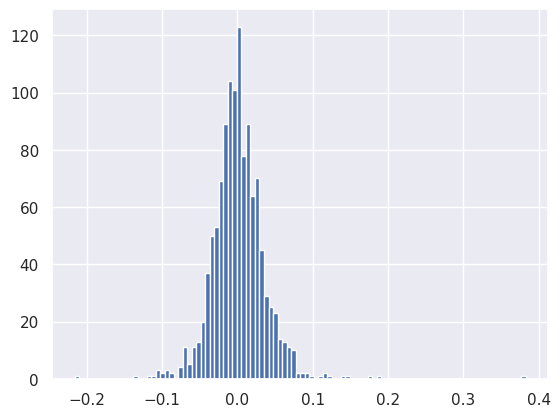

In [79]:
import seaborn as sns
sns.set()

df.Daily_change.hist(bins=100) # Bins - ilość słupków na histogramie

<Axes: xlabel='Date'>

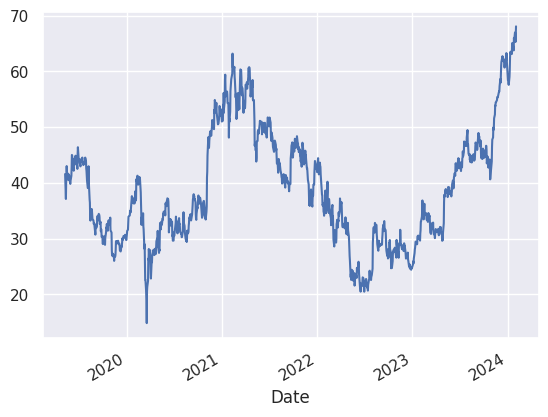

In [82]:
df.Close.plot()

### Filtrowanie danych

In [83]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2024-01-29,65.60,67.10,65.560,66.98,15902036,66.290,65.52,0.022283
2024-01-30,66.90,67.69,66.220,66.84,17562145,66.870,66.98,-0.002090
2024-01-31,65.70,66.25,64.845,65.27,17026414,65.485,66.84,-0.023489


In [96]:
df_positive = df[df.Daily_change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.960,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.510,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.570,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2024-01-19,64.90,65.385,64.41,65.11,20339427,65.005,64.88,0.003545
2024-01-25,64.28,66.030,63.71,66.00,21962965,65.140,63.76,0.035132
2024-01-29,65.60,67.100,65.56,66.98,15902036,66.290,65.52,0.022283


In [99]:
df_negative = df[df.Daily_change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2024-01-23,64.50,64.8100,63.690,64.32,13619608,64.410,64.55,-0.003563
2024-01-24,64.00,64.3975,63.220,63.76,17238147,63.880,64.32,-0.008706
2024-01-26,65.65,66.0450,65.290,65.52,13099618,65.585,66.00,-0.007273


In [98]:
df_positive.Daily_change.mean()

0.025902396564212435

In [100]:
df_negative.Daily_change.mean()

-0.023438874015312743

In [101]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2024-01-29    False
2024-01-30    False
2024-01-31    False
2024-02-01    False
2024-02-02    False
Length: 1192, dtype: bool

In [102]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [103]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-0.018353
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-0.023147


In [104]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2024-01-29,65.60,67.10,65.560,66.98,15902036,66.290,65.52,0.022283
2024-01-30,66.90,67.69,66.220,66.84,17562145,66.870,66.98,-0.002090
2024-01-31,65.70,66.25,64.845,65.27,17026414,65.485,66.84,-0.023489


In [106]:
df.index > ''

DatetimeIndex(['2019-05-10', '2019-05-13', '2019-05-14', '2019-05-15',
               '2019-05-16', '2019-05-17', '2019-05-20', '2019-05-21',
               '2019-05-22', '2019-05-23',
               ...
               '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25',
               '2024-01-26', '2024-01-29', '2024-01-30', '2024-01-31',
               '2024-02-01', '2024-02-02'],
              dtype='datetime64[ns]', name='Date', length=1192, freq=None)

In [108]:
df.index > '2019-11-01'

array([False, False, False, ...,  True,  True,  True])

In [111]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-04,31.45,31.75,30.120,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.970,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.580,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.450,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.915,27.01,45263118,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...
2024-01-29,65.60,67.10,65.560,66.98,15902036,66.290,65.52,0.022283
2024-01-30,66.90,67.69,66.220,66.84,17562145,66.870,66.98,-0.002090
2024-01-31,65.70,66.25,64.845,65.27,17026414,65.485,66.84,-0.023489


In [113]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')] # niestety nie można podać and

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [116]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [117]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2024-01-29,65.60,67.10,65.560,66.98,15902036,66.290,65.52,0.022283
2024-01-30,66.90,67.69,66.220,66.84,17562145,66.870,66.98,-0.002090
2024-01-31,65.70,66.25,64.845,65.27,17026414,65.485,66.84,-0.023489


In [121]:
df[df.index.year == 2020]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2020-01-02,29.94,31.000,29.79,30.99,20583240,30.465,29.74,0.042031
2020-01-03,30.62,31.430,30.48,31.37,18831450,30.995,30.99,0.012262
2020-01-06,31.01,32.060,31.00,31.58,21215865,31.295,31.37,0.006694
2020-01-07,31.79,32.840,31.36,32.81,30268966,32.300,31.58,0.038949
2020-01-08,32.73,34.520,32.46,33.93,43955449,33.330,32.81,0.034136
...,...,...,...,...,...,...,...,...
2020-12-24,53.60,53.625,52.29,52.88,6316761,53.240,53.71,-0.015453
2020-12-28,53.02,53.130,51.56,51.97,12058981,52.495,52.88,-0.017209
2020-12-29,52.33,52.990,51.47,52.27,10140561,52.300,51.97,0.005773


In [122]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-05-24,38.05,38.660,37.770,37.96,22074721,38.005,38.66,-0.018107
2023-05-25,38.48,38.585,37.525,37.95,18634222,38.215,37.96,-0.000263
2023-05-26,38.24,38.760,38.220,38.45,14438769,38.345,37.95,0.013175


In [124]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-07-01,46.980,47.0400,44.0600,44.27,17739998,45.6250,46.38,-0.045494
2019-08-01,42.140,42.5355,41.0000,41.31,7349740,41.7250,42.14,-0.019696
2019-10-01,30.370,30.5100,28.6500,29.15,13448055,29.7600,30.47,-0.043321
2019-11-01,31.450,31.7000,30.7412,31.37,10460430,31.4100,31.50,-0.004127
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,27.92,-0.089542
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,30.27,-0.062108
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,36.32,-0.013767
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,31.08,-0.020914
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,33.63,0.019923
